<a href="https://colab.research.google.com/github/shelke16/DL/blob/main/CNN_MNIST_Fashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
# Instead of importing 'preprocessing', directly import the specific preprocessing layer you need.
# For example, if you need TextVectorization:
from tensorflow.keras.layers import TextVectorization
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from tqdm.notebook import tqdm
import random
import warnings
warnings.filterwarnings("ignore")

In [4]:
(trainX, trainY), (testX, testY) = tf.keras.datasets.fashion_mnist.load_data()

trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))

trainY_cat = tf.keras.utils.to_categorical(trainY)
testY_cat = tf.keras.utils.to_categorical(testY)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
train_norm = trainX.astype('float32')
test_norm = testX.astype('float32')

train_norm = train_norm / 255.0
test_norm = test_norm / 255.0

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

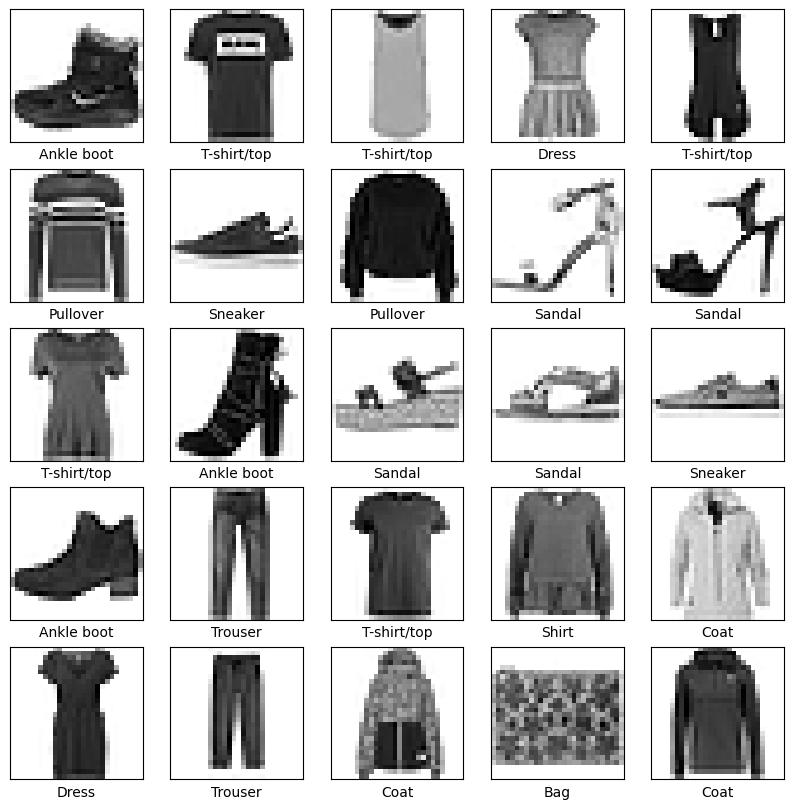

In [7]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(trainX[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[trainY[i]])
plt.show()

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu', padding='same', name='conv-layer-1'),
    tf.keras.layers.AvgPool2D(pool_size=(2, 2), name='pooling-layer-1'),
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', name='conv-layer-2'),
    tf.keras.layers.AvgPool2D(pool_size=(2, 2), name='pooling-layer-2'),
    tf.keras.layers.GlobalAveragePooling2D(name='pooling-layer-3'),
    tf.keras.layers.Dense(len(class_names), activation="softmax", name="output-layer")
])

In [9]:
model.compile(loss="categorical_crossentropy",
             optimizer="adam",
             metrics=["accuracy"])

In [10]:
history = model.fit(trainX, trainY_cat, epochs=10, validation_data=(testX, testY_cat))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 42ms/step - accuracy: 0.6030 - loss: 1.2673 - val_accuracy: 0.7896 - val_loss: 0.6081
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 43ms/step - accuracy: 0.8077 - loss: 0.5594 - val_accuracy: 0.8208 - val_loss: 0.5209
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 93s 49ms/step - accuracy: 0.8297 - loss: 0.4891 - val_accuracy: 0.8425 - val_loss: 0.4630
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 42ms/step - accuracy: 0.8423 - loss: 0.4479 - val_accuracy: 0.8474 - val_loss: 0.4407
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 41ms/step - accuracy: 0.8541 - loss: 0.4136 - val_accuracy: 0.8596 - val_loss: 0.4119
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 42ms/step - accuracy: 0.8596 - loss: 0.3994 - val_accuracy: 0.8579 - val_loss: 0.4147
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 41ms/step - accuracy: 0.8673 - loss: 0.3786 - val_accuracy: 0.8510 - val_loss: 0.4382
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 42ms/step - accuracy: 0.8735 -

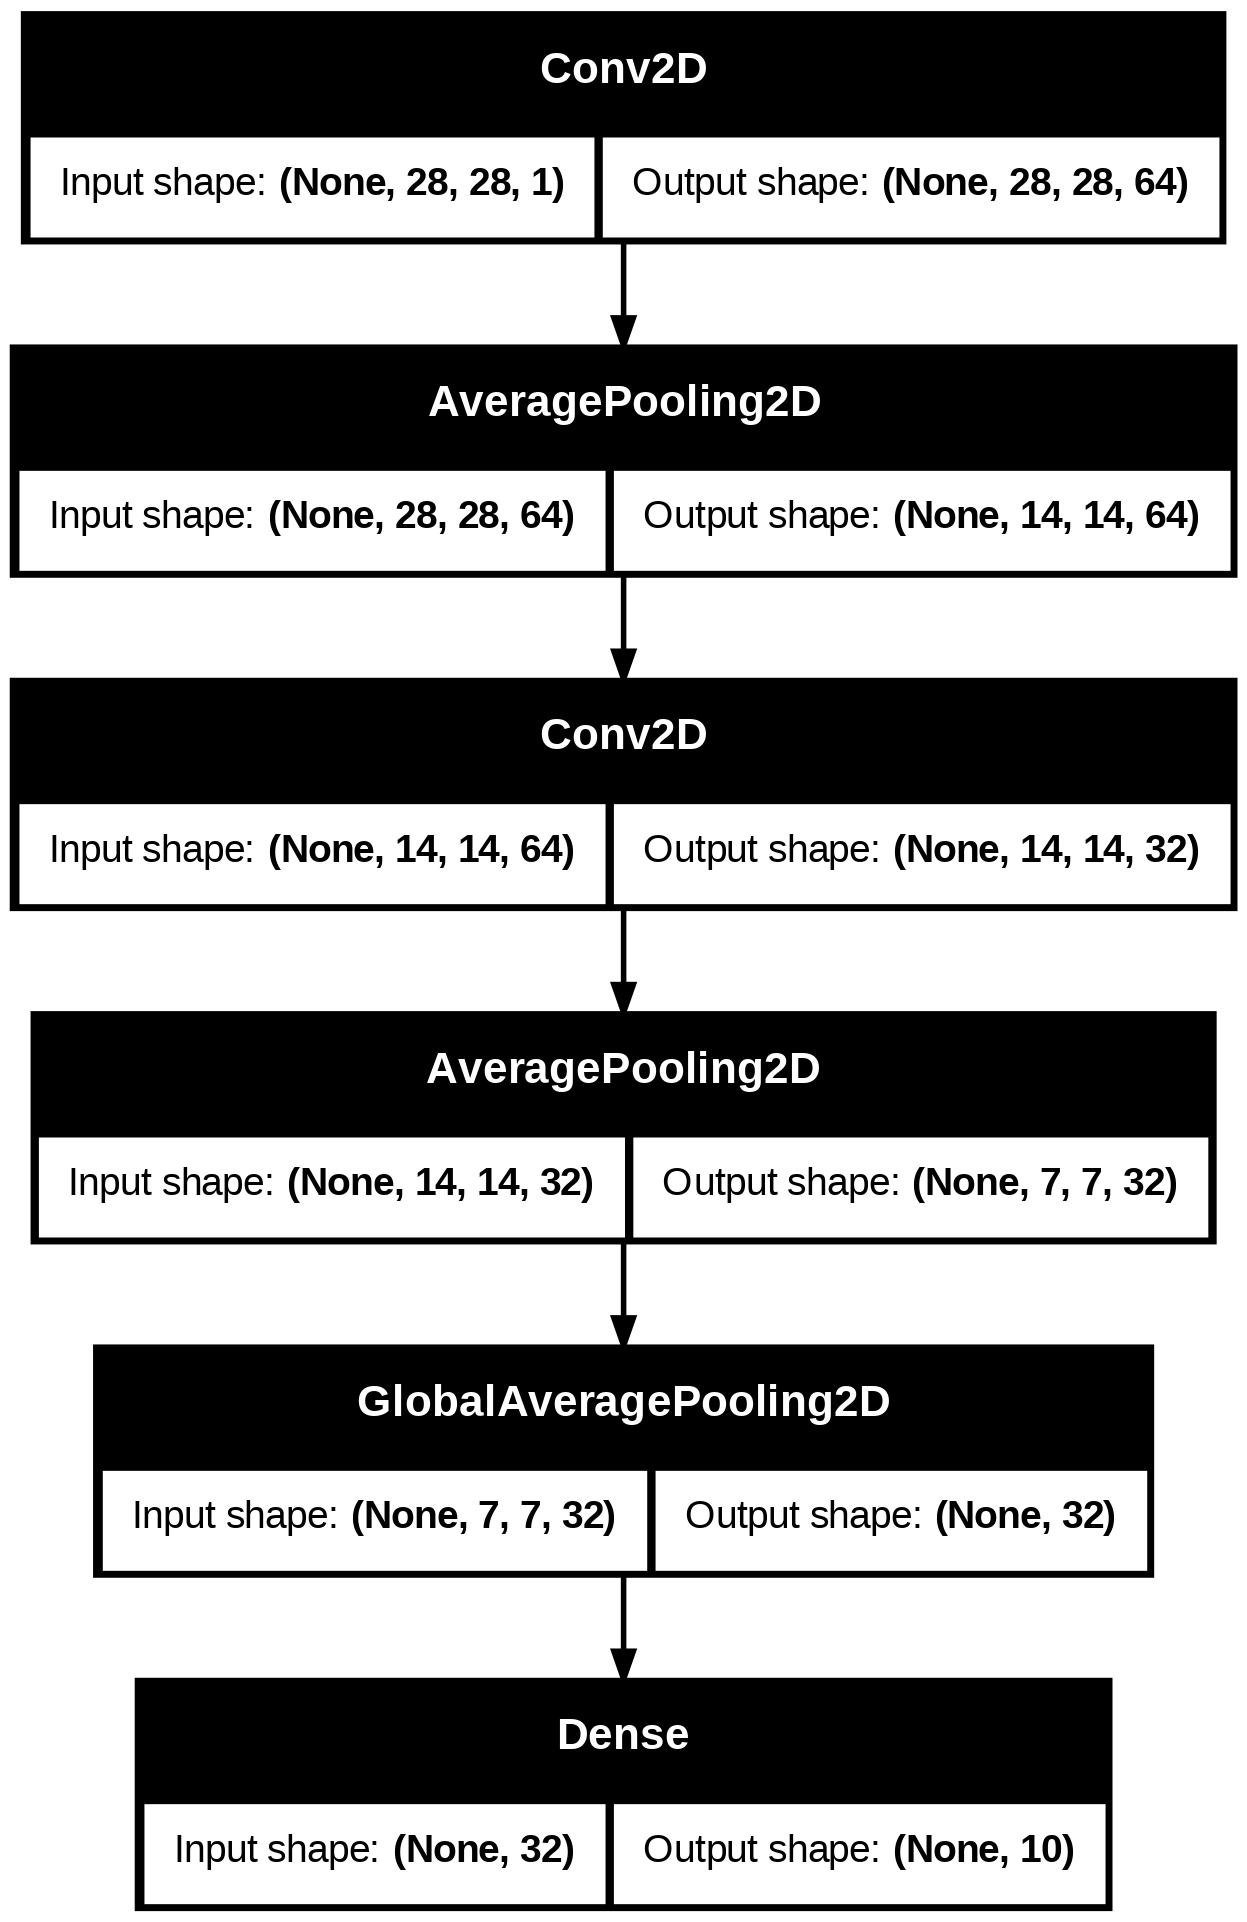

In [11]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv-layer-1 (Conv2D)           │ (None, 28, 28, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling-layer-1                 │ (None, 14, 14, 64)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv-layer-2 (Conv2D)           │ (None, 14, 14, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling-layer-2                 │ (None, 7, 7, 32)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling-layer-3                 │ (None, 32)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output-layer (Dense)            │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58,304 (227.75 KB)

 Trainable params: 19,434 (75.91 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 38,870 (151.84 KB)

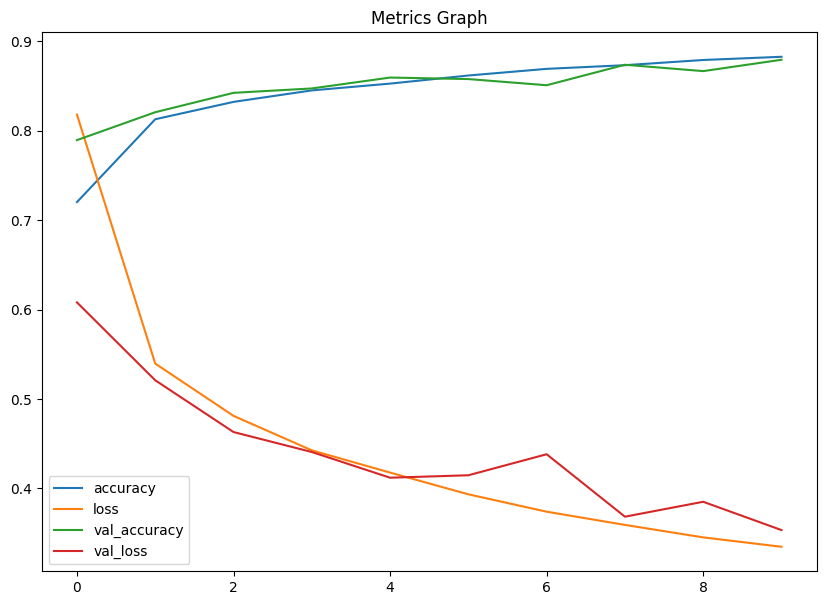

In [13]:
pd.DataFrame(history.history).plot(figsize=(10,7))
plt.title("Metrics Graph")
plt.show()

In [14]:
model.evaluate(testX, testY_cat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.8829 - loss: 0.3435


[0.3533686697483063, 0.8794999718666077]

In [15]:
predictions = model.predict(testX)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


In [16]:
predictions = tf.argmax(predictions, axis=1)


y_test = tf.argmax(testY_cat, axis=1)


y_test = tf.Variable(y_test)


print(metrics.accuracy_score(y_test, predictions))

0.8795


In [17]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83      1000
           1       0.99      0.97      0.98      1000
           2       0.79      0.87      0.82      1000
           3       0.81      0.93      0.86      1000
           4       0.84      0.69      0.76      1000
           5       0.95      0.99      0.97      1000
           6       0.72      0.64      0.68      1000
           7       0.96      0.94      0.95      1000
           8       0.96      0.97      0.97      1000
           9       0.96      0.95      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



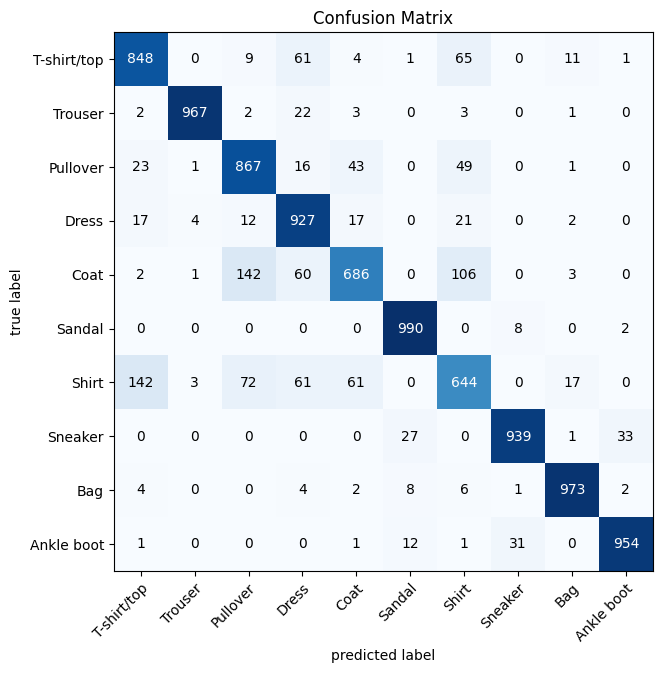

In [18]:
cm = metrics.confusion_matrix(y_test, predictions)
plot_confusion_matrix(cm, figsize=(10,7), class_names=class_names)
plt.title("Confusion Matrix")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


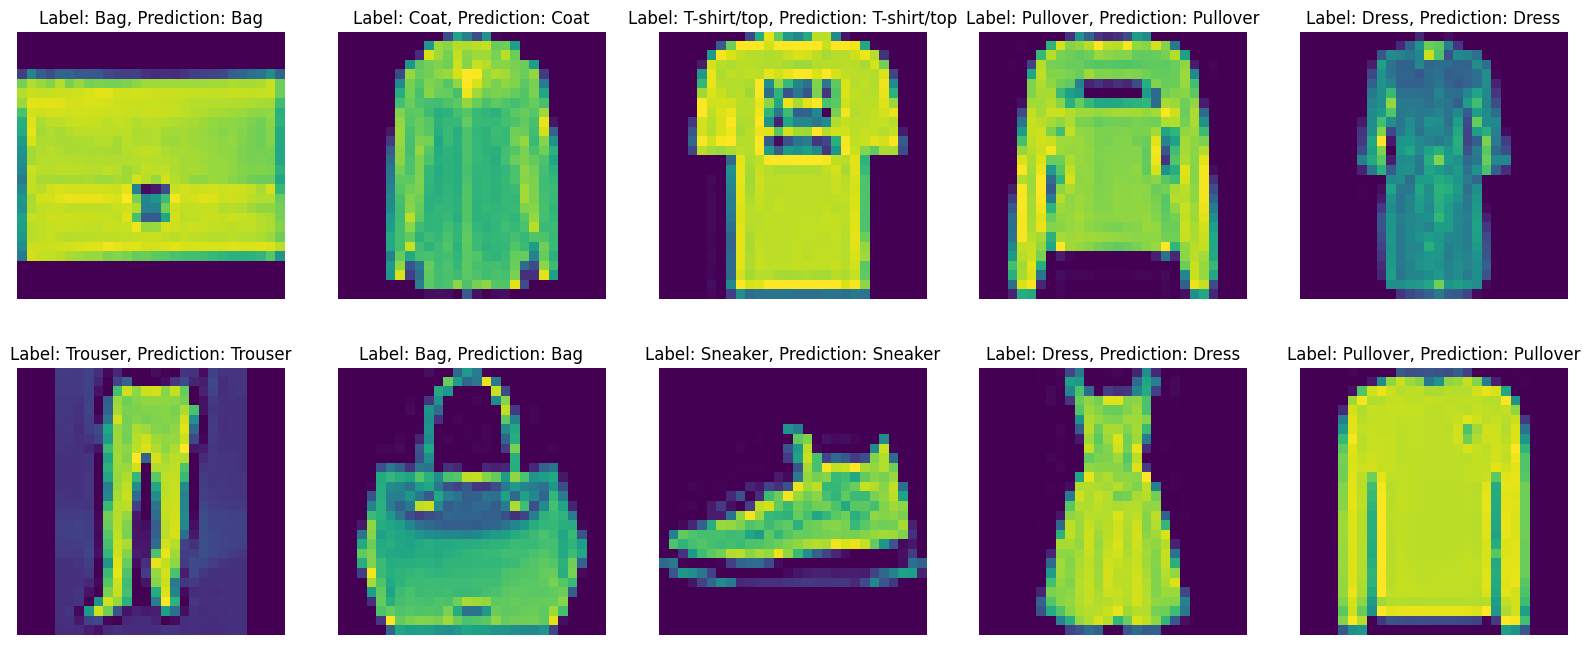

In [19]:
images = []
labels = []
random_indices = random.sample(range(len(testX)), 10)
for idx in random_indices:
    images.append(testX[idx])
    labels.append(testY_cat[idx])
images = np.array(images)
labels = np.array(labels)

fig = plt.figure(figsize=(20, 8))
rows = 2
cols = 5
x = 1
for image, label in zip(images, labels):
    fig.add_subplot(rows, cols, x)
    prediction = model.predict(tf.expand_dims(image, axis=0))
    prediction = class_names[tf.argmax(prediction.flatten())]
    label = class_names[tf.argmax(label)]
    plt.title(f"Label: {label}, Prediction: {prediction}")
    plt.imshow(image/255.)
    plt.axis("off")
    x += 1